In [3]:
#SE IMPORTAN LIBRERIAS NECESARIAS.
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph      # Librería para la representación gráfica

In [4]:
# SE DEFINE UNA FUNCION PARA CALCULAR ERLANG B
def erlang2(ro, R):
    R= int (R)
    A = ((R*ro)**R)/ (math.factorial(R))
    B= sum(((R*ro)**i) / math.factorial(i) for i in range(0, R-1))

    E2= (A / (B*(1-ro) + A))

    return E2


In [5]:
# SE DEFINEN VARIABLES Y SE HACEN LOS CALCULOS PERTINENTES DE DELAY FACTOR
ro = np.arange(0, 1, 0.01)
C1 = 1e9 # La capacidad del Canal seteada en 1Gbps
rp1 =20e6 # Velocidad maxima dada al usuario 20Mbps
R1 = C1 / rp1
Fr1= 1 + (erlang2(ro,R1)/(R1*(1-ro)))  #delay factor 1

#Cambiando la velocidad maxima a 50Mbps
rp2= 50e6
R2= C1 / rp2
Fr2= 1 + (erlang2(ro,R2)/(R2*(1-ro)))  #delay factor 2

#Cambiando la velocidad maxima a 100Mbps
rp3= 100e6
R3= C1 / rp3
Fr3= 1 + (erlang2(ro,R3)/(R3*(1-ro)))  #delay factor 3

#Cambiando la velocidad maxima a 200Mbps
rp4= 200e6
R4= C1 / rp4
Fr4= 1 + (erlang2(ro,R4)/(R4*(1-ro)))  #delay factor 4

#Seteando el R a 3
R6 = 3
rp6= C1/R6 
Fr6= 1 + (erlang2(ro,R6)/(R6*(1-ro)))


## REPRESENTACIÓN GRÁFICA DEL DELAY FACTOR

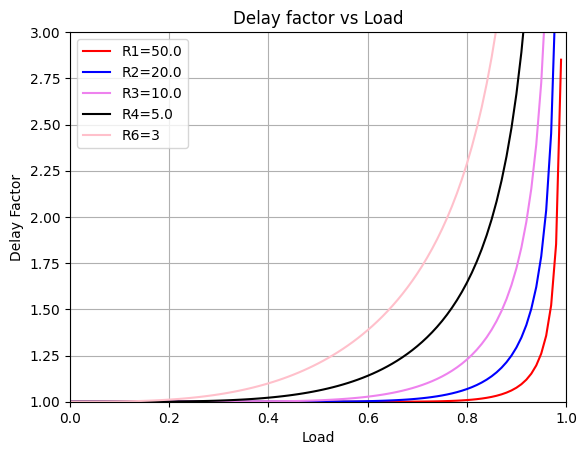

In [6]:
plt.plot(ro,Fr1,label='R1={}'.format(R1),color="red") # PLOTEA EL DELAY FACTOR 1 CON EL LABEL CON EL VALOR DEL R QUE LE CORRESPONDE Y LO GRAFICA EN ROJO.
plt.plot(ro,Fr2,label='R2={}'.format(R2),color="blue")
plt.plot(ro,Fr3,label='R3={}'.format(R3),color="violet")
plt.plot(ro,Fr4,label='R4={}'.format(R4),color="black")
plt.plot(ro,Fr6,label='R6={}'.format(R6),color="pink")
plt.title('Delay factor vs Load') # lE DAMOS EL TITULO AL GRÁFICO
plt.ylabel('Delay Factor') # SETEA EL NOMBRE DEL EJE Y
plt.ylim(1, 3) # PARAMETRIZA EL RANGO DEL EJE Y ENTRE 1 Y 3
plt.xlabel('Load') # SETEA EL NOMBRE DEL EJE X
plt.xlim(0,1) #PARAMETRIZA EL RANGO DEL EJE X ENTRE 0 Y 1
plt.legend(loc='upper left') # Muestra las legendas con los datos que le ponemos en label al plotear.
plt.grid() # MUESTRA EL CUADRICULADO
#plt.show() # ESTE PARAMETRO SE SUELE UTILIZAR PARA QUE GRAFIQUE Y MUESTRE EL GRAFICO. EN EL ENTORNO DE JUPYTER NO HACE FALTA.


In [8]:
# SE HACEN LOS CALCULOS PERTINENTES DE THROUGHPUT
Th1= (rp1/(C1*Fr1))
Th2= (rp2/(C1*Fr2))
Th3= (rp3/(C1*Fr3))
Th4= (rp4/(C1*Fr4))
Th5= (1-ro)
Th6= (rp6/(C1*Fr6))

## REPRESENTACIÓN GRÁFICA DEL THROUGHPUT

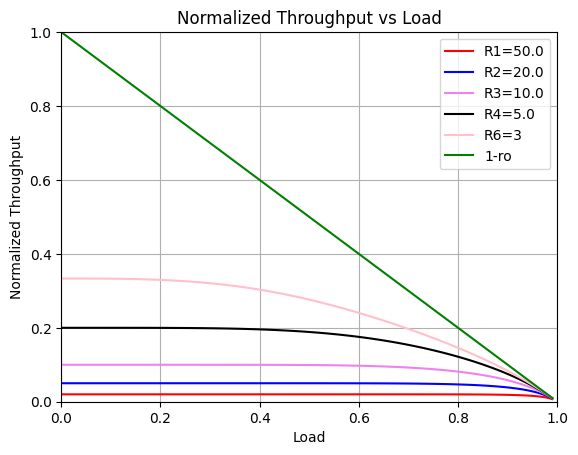

In [9]:
plt.plot(ro,Th1,label='R1={}'.format(R1),color="red")
plt.plot(ro,Th2,label='R2={}'.format(R2),color="blue")
plt.plot(ro,Th3,label='R3={}'.format(R3),color="violet")
plt.plot(ro,Th4,label='R4={}'.format(R4),color="black")
plt.plot(ro,Th6,label='R6={}'.format(R6),color="pink")
plt.plot(ro,Th5,label='1-ro',color="green")
plt.title('Normalized Throughput vs Load')
plt.ylabel('Normalized Throughput')
plt.ylim(0,1)
plt.xlabel('Load')
plt.xlim(0,1)
plt.legend(loc='upper right') # Muestra las legendas con los datos que le ponemos en label al plotear.
plt.grid()
plt.show()

## Probabilidad de Bloqueo

20.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10516\3879643012.py:3: RuntimeWarning: divide by zero encountered in power
  D1 = ro ** (N-R1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10516\3879643012.py:4: RuntimeWarning: invalid value encountered in multiply
  F1 = erlang2(ro,R1) * D1 * (1-ro) / ( 1 - ((erlang2(ro,R1)) * D1 * ro) )


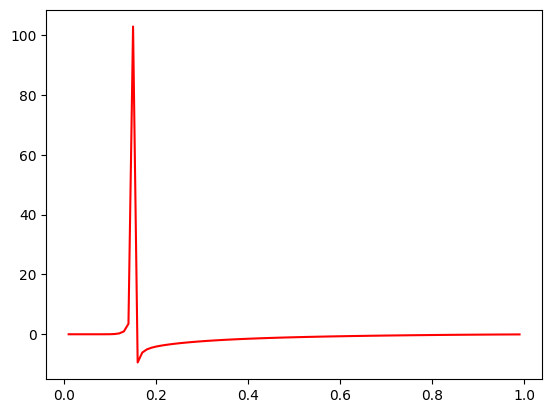

In [15]:
rm= 50e6
N= C1 / rm
D1 = ro ** (N-R1)
F1 = erlang2(ro,R1) * D1 * (1-ro) / ( 1 - ((erlang2(ro,R1)) * D1 * ro) )
#F2 = ((ro ** R2) * (1-ro)) / (1- (ro ** R2+1))
#F3 = ((ro ** R3) * (1-ro)) / (1- (ro ** R3+1))
#F4 = ((ro ** R4) * (1-ro)) / (1- (ro ** R4+1))
plt.plot(ro,F1,label='N={}'.format(N),color="red")
print(N)
#plt.plot(ro,F2,label='R2={}'.format(R2),color="blue")
#plt.plot(ro,F3,label='R3={}'.format(R3),color="violet")
#plt.plot(ro,F4,label='R4={}'.format(R4),color="black")